# 00-01 : Data Selection

This project will use customer reviews/complaints scraped from the Hellopeter site between 2021 and 2023. This dataset was [created](https://github.com/JohnnyFoulds/dsm050-2023-apr/blob/master/notebooks/01_hellopeter/01-01_retrieve_data.ipynb) in another research project investigating [](https://github.com/JohnnyFoulds/dsm050-2023-apr/blob/master/notebooks/04_draft/04-04_cw02.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../../data/hellopeter'
source_file = '01-02_reviews.parquet.gz'

## Data Load

In [3]:
df_source = pd.read_parquet(f'{data_path}/{source_file}')

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head(3).T)   

(93880, 28)


,0,1,2
id,4527127,4527105,4526994
user_id,320a79a8-31fa-11e8-83f4-f23c91bb6188,6a44e350-9c25-11ea-9513-4b6a247180c8,2ad8a520-811e-11ed-9e3d-2143ef18dbd4
created_at,2023-07-24 14:01:29,2023-07-24 13:53:40,2023-07-24 13:10:31
authorDisplayName,Simphiwe N,erika H,Eulanda M
author,Simphiwe N,erika H,Eulanda M
authorAvatar,,,
author_id,320a79a8-31fa-11e8-83f4-f23c91bb6188,6a44e350-9c25-11ea-9513-4b6a247180c8,2ad8a520-811e-11ed-9e3d-2143ef18dbd4
review_title,Out of bundle data eating up my airtime even a...,worst service - Vodacom.,Cancel Vodacom contract please. 😒
review_rating,1,1,1
review_content,Out of bundle services stopped working after I...,I have been a customer of Vodacom for more tha...,Now that Vodacom com collected the router. No...


## Feature Selection

Only the id, title, and content of the review will be used in this project.  

In [4]:
features = [
    'id',
    'created_at',
    'review_title',
    'review_content',
    'business'
]

df_features = df_source[features].copy()

print(df_features.shape)
with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    display(df_features.head(2))

(93880, 5)


,id,created_at,review_title,review_content,business
0,4527127,2023-07-24 14:01:29,Out of bundle data eating up my airtime even after stopping it on many years ago.,"Out of bundle services stopped working after I did my simswap meaning airtime was being used for internet services after loading airtime. I only found this out because my airtime was just vanishing without me using it. I just called the call centre and they confirmed that it was the out of bundle setting that is causing this. I then point out that even though I did a SimSwap I am still using the same number I had set the out of bundle setting to stop using my airtime for internet services so I do not understand how a simswap affects settings in place on a long existing number. I did not change numbers, I changed simcards and the out of bundle setting is done on the NUMBER not the simcard so it makes no sense to me how a simswap affects the settings in place on my number. To be clear, I called vodacom many moons ago and told them, please stop using my airtime for data services and they stopped it, things were fine for many years until the current simswap was done. My argument here is why should a simswap matter cause the setting is done on the number and not on the simcard. So it makes no sense that a simswap resets everything. Even if it does the history on my number shows what settings are in place linked to my number. I would like my airtime used for data services replenished since I did my simswap. I have wifi at home and there is no reason why my airtime would be used for data services.\n\nFurthermore what led to me doing a simswap is that my number simply stopped working, I could not make or receive calls. The last time this happened I had received a call from a person claiming to be from VODACOM. The person told me that someone did a simswap on my number and I need to switch off my phone for 2 hours in order for them to block the simswap from happening. In turned out the person was not from vodacom and me switch off my phone for 2 hours is actually what made the Simswap happen. I queried this and I did not get meaningful information from Vodacom. I queried again today and the day I made the SimSwap and nobody can explain to me what keeps happening to my number. I need an explanation as to why my number would just randomly stop working.\n\nMy simcard has not been taken out of my phone this whole year so there is not damage that happened to it as it was tucked into the simcard slot the whole time. I very frustrated because clearly there is ******** activities happening on my number and it's leaving a bad taste in my mouth cause vodacom has no answers. I also tried to speak to your support on twitter and they too could not help. It's like nobody has any knowledge of anything.",vodacom
1,4527105,2023-07-24 13:53:40,worst service - Vodacom.,"I have been a customer of Vodacom for more than 30 years. never was a payment skipped. I have 4 contracts with them. I have been trying to upgrade my phone without any success. time and money wasted every minute trying to sort this out!!\n\nI got married in 2020, i changed my surname at the Vodacom shop in Secunda.\nin 2023 I had to upgrade my wifi which i did but for some reason I had to travel 50 km to Vodacom Woodlands in Pretoria because Anita phoned me and said I need to come in. I then changed my surname with her.\n\nI have to upgrade an phone and first Anita gave me the incorrect information and promised a phone I cannot have. my upgrade was done over the phone, but RAM refused to give the telephone to me as my surname is still not changed on the system.\n\ni changed my surname 2 x in the last two week. still not updated with Vodacom so i cannot have my phone. In the meantime I have to sit with the inconvenience.\nI gave RAM a copy of my marriage certificate as well as a certified copy of my original ID and it was not good enough. \n\nI want to cancel everything with Vodacom but then I have to pay penalties!!!! for a se

In [5]:
# drop duplicates
df_features = df_features.drop_duplicates(subset='review_content')
print(df_features.shape)

(93425, 5)


## Business Selection

For this analysis, we will focus on `Vodacom`. 

In [6]:
df_selected = df_features[df_features['business'] == 'vodacom'].copy()
print(df_selected.shape)

(30293, 5)


## Data Range

Select the last 6 months of 2022 and the first 6 months of 2023.

In [7]:
# display the available date range
print(df_selected['created_at'].min(), 'to', df_selected['created_at'].max())

2021-01-01 03:54:20 to 2023-07-24 14:01:29


In [8]:
# select the last 6 months of 2022 and the first 6 months of 2023
df_date_range = df_selected[df_selected['created_at'].between('2022-06-01', '2023-07-01')].copy()
print(df_date_range.shape)

# display the available date range
print(df_date_range['created_at'].min(), 'to', df_date_range['created_at'].max())

(11206, 5)
2022-06-01 01:46:16 to 2023-06-30 23:15:55


## Review Length

Filter very short and very long reviews.

count    11206.000000
mean       141.886489
std        128.430396
min          2.000000
25%         65.000000
50%        106.000000
75%        176.000000
max       2021.000000
Name: review_word_count, dtype: float64


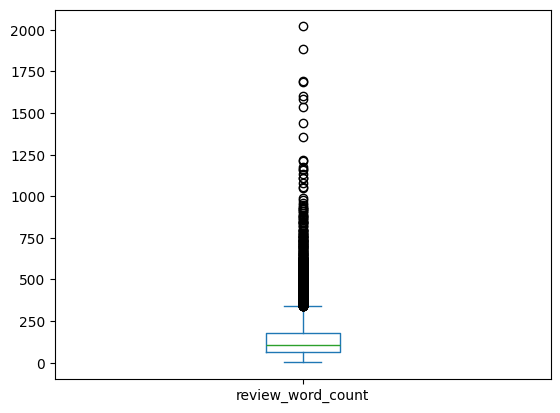

In [9]:
# add a review word count column
df_date_range['review_word_count'] = \
    df_date_range['review_title'].str.split().str.len() + \
    df_date_range['review_content'].str.split().str.len()


# display the distribution of the review_content_length
print(df_date_range['review_word_count'].describe())

# plot the distribution of the review_content_length
df_date_range['review_word_count'].plot(kind='box')
plt.show()

In [10]:
# with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
#     display(df_date_range.sort_values(by='review_word_count', ascending=True).head(60))

In [11]:
# select reviews between 10 and 1200 words
df_limited = df_date_range[df_date_range['review_word_count'] \
    .between(10, 100, inclusive='both')].copy()

# display the distribution of the review_word_count
print(df_limited['review_word_count'].describe())

with pd.option_context('display.max_columns', None, 'display.max_colwidth', None):
    display(df_limited.sample(5))

count    5218.000000
mean       61.502108
std        22.947626
min        10.000000
25%        44.000000
50%        63.000000
75%        81.000000
max       100.000000
Name: review_word_count, dtype: float64


,id,created_at,review_title,review_content,business,review_word_count
3902,4303128,2023-02-14 13:13:24,"Harassment, poor service, no customers service","So I still haven't gotten a response from you guys regarding the cancelation of my contract and now I'm paying a bill of R1250 this month. Plus you have the audacity to let your call centre call me constantly to sell me things, that sound so fabulous but then you get trapped into contracts.. That you believe can be cancelled at anytime. Please remove my name from your data base for sales. As my contracts will be canceled shortly with you.",vodacom,87
11066,3988077,2022-06-29 08:15:08,Pethethic Customer Service,"I bought a phone online, they gave it to RAM to deliver, RAm did not deliver and returned it back to Vodacom. Since then I have been fighting Vodacom to please update me as to how a I going to get my phone or my refund if they don't deliver in my area. They just went quiet, been sending them numerous emails. Such a poor customer service. I really regret wasting my money on them.",vodacom,78
767,4480775,2023-06-23 11:49:01,Waiting too long,"I have done an upgrade on my account at Vodacom East Rand Mall, they said that I would receive the Samsung Watch 4 free with my upgrade, this was on 7 June already, whenever I call they have not got stock, when will stock be available.",vodacom,49
8278,4113137,2022-09-29 19:51:36,Vodacom Sales Fraud,"Vodavom has opened an account using my business number and email address.\n\nThe number has currently being deleted as I refused to pay for a contract I never used,due to that I am unable to access my email address.\n\nThe person that has been allocated my number has access to all my personal data on that number an email.",vodacom,62
8598,4097511,2022-09-18 08:38:15,Disgruntled customer,I am very disappointed with the level of service I got from Vodacom fibre and some of their consultants. So I paid my Vodacom fibre in store as I was advices by one of their consultant than they sent a message and an email telling me that they got my payment. Little I know it was a different story and I still didn’t get my internet and I can’t get my money back.,vodacom,75


## Save the selected data

In [12]:
# select only the features needed for classification
selected_features = [
    'id',
    'review_title',
    'review_content'
]

# select the features
df_out = df_limited[selected_features].copy()

# save the output
df_out.to_parquet(f'{data_path}/00-01_vodacom_selected_reviews.parquet.gz', index=False, compression='gzip')